# SQLAlchemy, Sqlite, and Dates

## Setup

In [1]:
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
engine = create_engine("sqlite:///Resources/dow.sqlite", echo=False)

In [5]:
engine.execute('SELECT * FROM dow LIMIT 5').fetchall()

[(1, 1, 'AA', '2011-01-07', 15.82, 16.72, 15.78, 16.42, 239655616, None),
 (2, 1, 'AA', '2011-01-14', 16.71, 16.71, 15.64, 15.97, 242963398, None),
 (3, 1, 'AA', '2011-01-21', 16.19, 16.38, 15.6, 15.79, 138428495, None),
 (4, 1, 'AA', '2011-01-28', 15.87, 16.63, 15.82, 16.13, 151379173, None),
 (5, 1, 'AA', '2011-02-04', 16.18, 17.39, 16.18, 17.14, 154387761, None)]

In [6]:
inspector = inspect(engine)
columns = inspector.get_columns('dow')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
quarter INTEGER
stock TEXT
date TEXT
open_price FLOAT
high_price FLOAT
low_price FLOAT
close_price FLOAT
volume INTEGER
percent_change FLOAT


## Reflect and query dates

In [7]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Dow = Base.classes.dow

In [8]:
session = Session(engine)

## Analysis

Analyze the Average prices (open, high, low, close) for all stocks in the Month of May

In [11]:
# Getting to know the database
session.query(Dow.date).all()

[('2011-01-07'),
 ('2011-01-14'),
 ('2011-01-21'),
 ('2011-01-28'),
 ('2011-02-04'),
 ('2011-02-11'),
 ('2011-02-18'),
 ('2011-02-25'),
 ('2011-03-04'),
 ('2011-03-11'),
 ('2011-03-18'),
 ('2011-03-25'),
 ('2011-01-07'),
 ('2011-01-14'),
 ('2011-01-21'),
 ('2011-01-28'),
 ('2011-02-04'),
 ('2011-02-11'),
 ('2011-02-18'),
 ('2011-02-25'),
 ('2011-03-04'),
 ('2011-03-11'),
 ('2011-03-18'),
 ('2011-03-25'),
 ('2011-01-07'),
 ('2011-01-14'),
 ('2011-01-21'),
 ('2011-01-28'),
 ('2011-02-04'),
 ('2011-02-11'),
 ('2011-02-18'),
 ('2011-02-25'),
 ('2011-03-04'),
 ('2011-03-11'),
 ('2011-03-18'),
 ('2011-03-25'),
 ('2011-01-07'),
 ('2011-01-14'),
 ('2011-01-21'),
 ('2011-01-28'),
 ('2011-02-04'),
 ('2011-02-11'),
 ('2011-02-18'),
 ('2011-02-25'),
 ('2011-03-04'),
 ('2011-03-11'),
 ('2011-03-18'),
 ('2011-03-25'),
 ('2011-01-07'),
 ('2011-01-14'),
 ('2011-01-21'),
 ('2011-01-28'),
 ('2011-02-04'),
 ('2011-02-11'),
 ('2011-02-18'),
 ('2011-02-25'),
 ('2011-03-04'),
 ('2011-03-11'),
 ('2011-03-18'

In [30]:
# Query for the stock and average prices (open, high, low, close) 
# for all stock in the month of May
# Sort the result by stock name
# YOUR CODE HERE

sel = [Dow.stock, 
       func.round(func.avg(Dow.open_price), 2), 
       func.round(func.avg(Dow.high_price), 2), 
       func.round(func.avg(Dow.low_price), 2), 
       func.round(func.avg(Dow.close_price), 2)]
 
# may_averages = session.query(*sel).filter(Dow.date >= '2011-05-01', Dow.date <= '2011-05-31').group_by(sel[0]).all()

may_averages = session.query(*sel).filter(func.strftime("%m", Dow.date) == "05").group_by(sel[0]).all()

may_averages

[('AA', 16.85, 17.34, 16.42, 16.75),
 ('AXP', 49.9, 51.07, 49.31, 50.5),
 ('BA', 78.72, 79.22, 76.88, 78.21),
 ('BAC', 12.0, 12.23, 11.73, 11.88),
 ('CAT', 108.55, 110.6, 104.05, 106.4),
 ('CSCO', 17.07, 17.26, 16.59, 16.86),
 ('CVX', 103.97, 105.73, 100.46, 102.76),
 ('DD', 53.96, 54.92, 52.14, 53.21),
 ('DIS', 42.3, 42.82, 41.12, 41.9),
 ('GE', 19.96, 20.18, 19.49, 19.74),
 ('HD', 36.77, 37.51, 36.5, 36.76),
 ('HPQ', 39.31, 40.14, 37.84, 38.54),
 ('IBM', 169.7, 171.58, 166.94, 169.12),
 ('INTC', 23.1, 23.67, 22.65, 23.02),
 ('JNJ', 65.66, 66.85, 65.06, 66.09),
 ('JPM', 44.02, 44.71, 43.02, 43.53),
 ('KO', 67.58, 68.32, 66.76, 67.47),
 ('KRFT', 34.3, 35.02, 33.95, 34.74),
 ('MCD', 79.96, 81.55, 79.8, 80.85),
 ('MMM', 95.18, 96.21, 93.24, 94.66),
 ('MRK', 36.57, 37.18, 36.21, 36.69),
 ('MSFT', 25.23, 25.58, 24.68, 25.04),
 ('PFE', 20.75, 21.11, 20.39, 20.77),
 ('PG', 65.91, 67.18, 65.49, 66.42),
 ('T', 31.28, 31.7, 30.97, 31.32),
 ('TRV', 62.76, 63.34, 61.88, 62.38),
 ('UTX', 88.44, 89

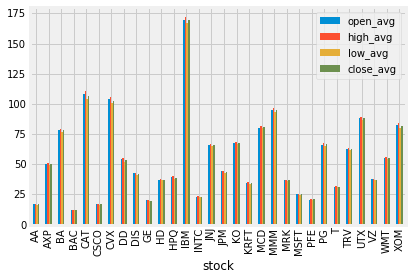

In [33]:
# Plot the Results in a Matplotlib bar chart
# YOUR CODE HERE
df = pd.DataFrame(may_averages, columns=['stock', 'open_avg','high_avg','low_avg','close_avg'])
df.set_index('stock', inplace=True)
df.plot.bar()
plt.show()

### Bonus
Calculate the high-low peak-to-peak (PTP) values for `IBM` stock after `2011-05-31`. 
* Note: high-low PTP is calculated using `high_price` - `low_price`
* Use a DateTime.date object in the query filter
* Use a list comprehension or numpy's ravel method to unpack the query's list of tuples into a list of PTP values.
* Use matplotlib to plot the PTP values as a boxplot

In [ ]:
# Design a query to calculate the PTP for stock `IBM` after May, 2011
# YOUR CODE HERE
ptps

In [ ]:
# Load the query into a dataframe, set the index to the date, and plot the ptps
# YOUR CODE HERE